### Enrolment of Students in Different Grades Based on their Age in India

The dataset used for this question is the enrolment of students in different grades based on their age(https://data.gov.in/resource/enrolment-age-and-class-udise-plus-during-2019-20) in all the districts in the country.

In [ ]:
#library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [211]:
#loading the data : Enrolment of students based on their age in different grades in India (2019-2020)
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSb-XBZG4mBnPp91ujo-Bj1FlZRLfrwYEe0sZx3tP84x6uPRG_7d5y5aCtBGuBARrzz9bLAhY5b3hBJ/pub?gid=885840262&single=true&output=csv"
df = pd.read_csv(url)

In [212]:
#Data of Kerala only
df_data = df.loc[(df['state_name'] == 'Kerala' )]

### Bar plot of number of boys and girls enroled in each grade in Kerala.

In [ ]:
#Total number of enrolments in each grade

total_enrolments = df_data.sum(axis=0, numeric_only=True)[3:]

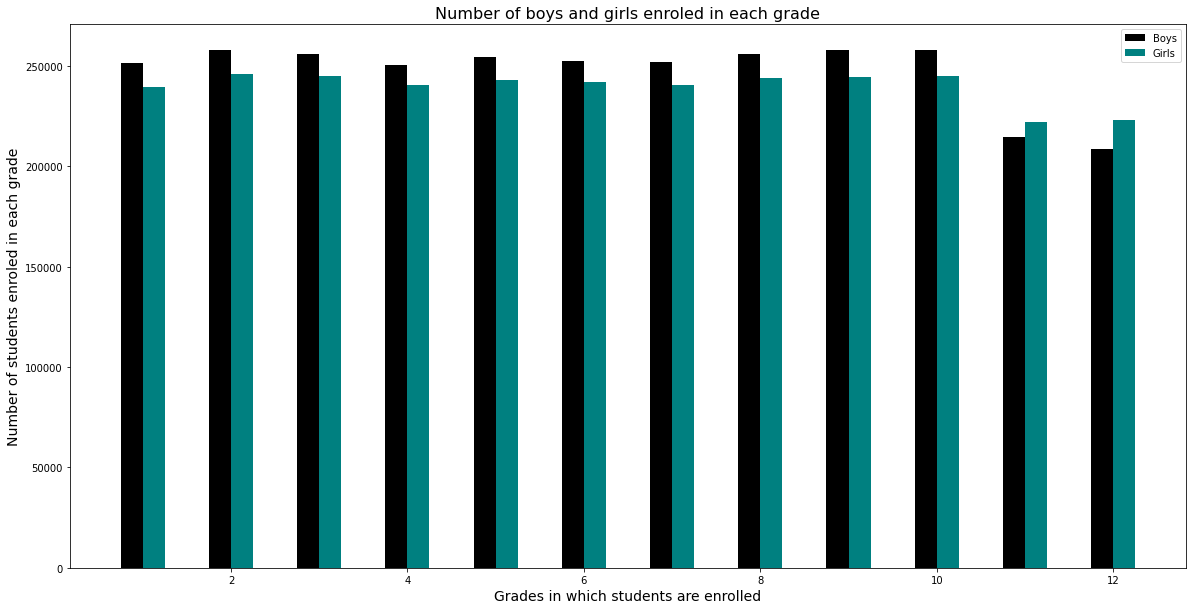

In [ ]:
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
boys_total = total_enrolments[:12].to_list()
girls_total = total_enrolments[12:].to_list()

x = np.arange(1,len(labels)+1)  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(20,10))
rects1 = plt.bar(x - width/2, boys_total, width, label='Boys', color = 'black')
rects2 = plt.bar(x + width/2, girls_total, width, label='Girls', color = 'teal')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Grades in which students are enrolled", size=14)
plt.ylabel("Number of students enroled in each grade", size=14)
plt.title("Number of boys and girls enroled in each grade", size=16)
plt.legend()

plt.show()


Bar plot is a good way to compare two quantities of interest. In this case, it is the enrolment of the number of boys and girls in each grade. It can be observed that from grade 1 to 10, the number of boys enroled is higher than the number of girls. but in grade 11 and 12, the number of girls are more. In a state with sex ratio more than 1000 (1084, as per 2011 census), it is surprising to see that the enrolment of girls is less than boys. But when it comes to higher grades, the drop out is more in case of boys.

### Line Plot of Students enroled in each grade in different zones of Kerala

In [ ]:
#zonewise enrolment data
North = df_data.loc[(df_data['district_name'] == 'KASARAGOD') | (df_data['district_name'] == 'KANNUR') |
                    (df_data['district_name'] == 'WAYANAD') | (df_data['district_name'] == 'KOZHIKODE') | 
                    (df_data['district_name'] == 'MALAPPURAM')]
North_enrolments = North.sum(axis=0, numeric_only=True)[3:]

Center = df_data.loc[(df_data['district_name'] == 'PALAKKAD') | (df_data['district_name'] == 'THRISSUR')|
                     (df_data['district_name'] == 'ERNAKULAM') | (df_data['district_name'] == 'IDUKKI') | 
                     (df_data['district_name'] == 'KOTTAYAM')]
Center_enrolments = Center.sum(axis=0, numeric_only=True)[3:]

South= df_data.loc[(df_data['district_name'] == 'ALAPPUZHA') | (df_data['district_name'] == 'PATHANAMTHITTA')|
                   (df_data['district_name'] == 'KOLLAM') | (df_data['district_name'] == 'THIRUVANANTHAPURAM')]
South_enrolments = South.sum(axis=0, numeric_only=True)[3:]


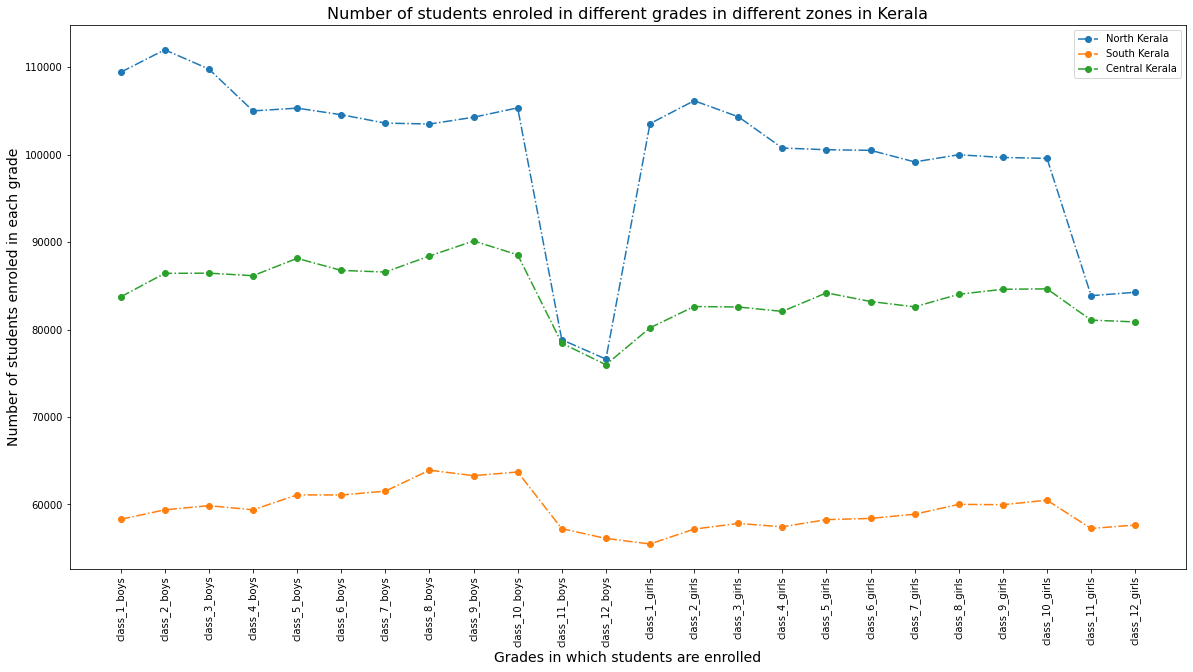

In [ ]:
# define data values
x = df_data.columns[6:].values.tolist()
north = North_enrolments.to_list() 
south = South_enrolments.to_list() 
center = Center_enrolments.to_list()

# Plot the chart
plt.figure(figsize=(20,10))
plt.plot(x, north, label='North Kerala', marker='o', linestyle='dashdot')
plt.plot(x, south, label='South Kerala', marker='o', linestyle='dashdot')
plt.plot(x, center, label='Central Kerala', marker='o', linestyle='dashdot')

plt.xlabel("Grades in which students are enrolled", size=14)
plt.ylabel("Number of students enroled in each grade", size=14)
plt.title("Number of students enroled in different grades in different zones in Kerala", size=16)
plt.xticks(x ,rotation=90)
plt.legend()
plt.show()  


Line plot is used to analyse the number of students enroled in different grades in different parts of Kerala. It can be observed that the number of students enroled in schools are more in the northern part of the state owing to the higher population. We can observe a dip in the number of students in higher grades as in the previous plot. One interesting observation is that even with large population in the northern part of the country, the number of students enroled in $11^{th}$ and $12^{th}$ grade is same in the northern and central part of Kerala.

### Scatter plot of girls and boys enroled in $11^{th}$ and $12^{th}$ in Kerala

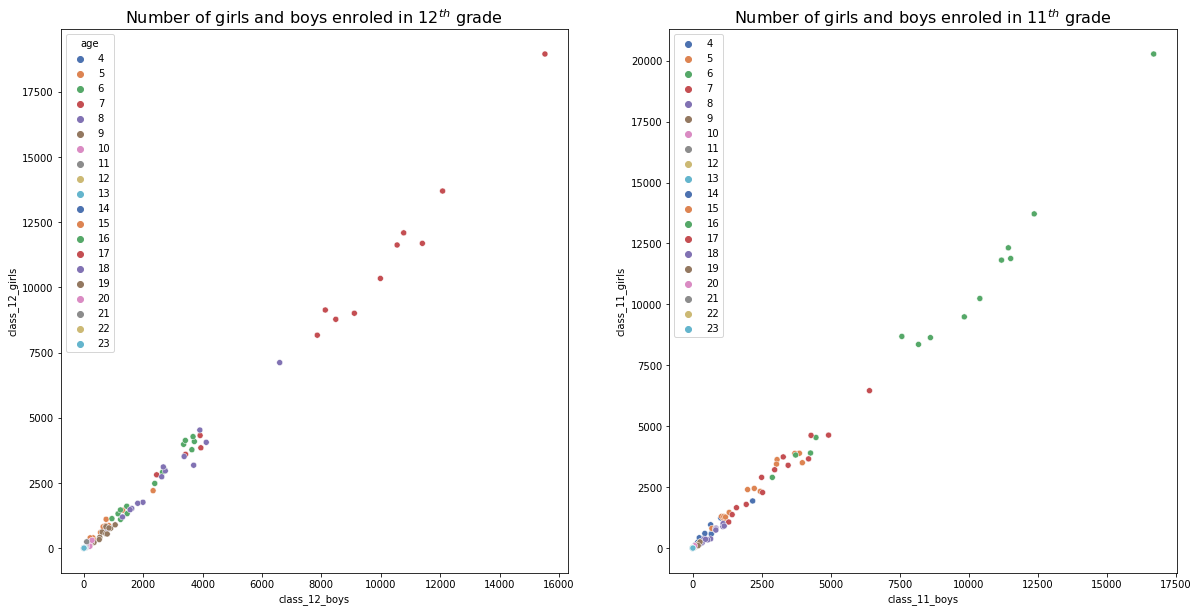

In [167]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.scatterplot(x = df_data['class_12_boys'], y = df_data['class_12_girls'], data=df_data, hue='age', palette="deep");
plt.title("Number of girls and boys enroled in $12^{th}$ grade", size=16)
plt.subplot(1,2,2)
sns.scatterplot(x = df_data['class_11_boys'], y = df_data['class_11_girls'], data=df_data, hue='age', palette="deep");
plt.title("Number of girls and boys enroled in $11^{th}$ grade", size=16)

plt.legend()
plt.show() 

It can be observed from the scatter plot that most students enroled in $11^{th}$ grade is of age 16 and that of $12^{th}$ grade is 17. But there are students of age above 20 also who are enroled in these grades. Also, the number of girls are more in both $11^{th}$ and $12^{th}$.

### Box Plot

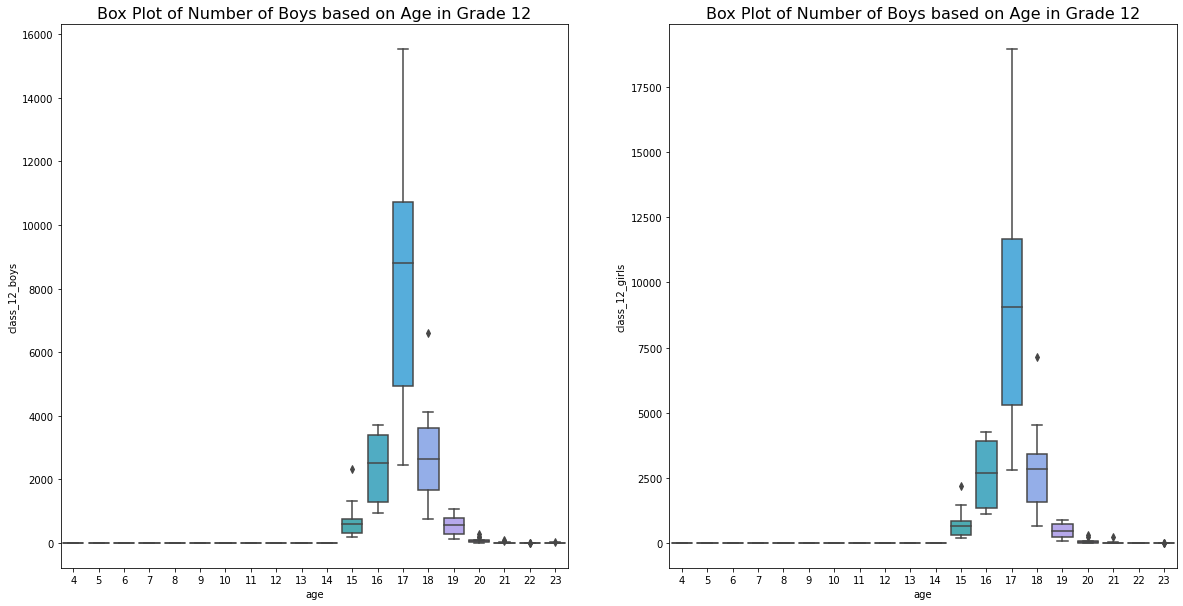

In [191]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.boxplot(data=df_data, x="age", y="class_12_boys")
plt.title("Box Plot of Number of Boys based on Age in Grade 12", size=16)
plt.subplot(1,2,2)
sns.boxplot(data=df_data, x="age", y="class_12_girls")
plt.title("Box Plot of Number of Boys based on Age in Grade 12", size=16)
plt.show()

As in case of the previous plot, it is observed that the maximum number of students in $12^{th}$ grade belong to 17 years in case of both boys and girls. There are some outliers also.